# **Customer Purchase Frequency Prediction**

### _**Introduction**_

In this notebook, I want to create a neural network in order to find out the loyalty of a customer based on his purchase history.  
This will help to find a better approach to different customers, how exactly to increase the company's sales. 

I will also use different types of neural networks to find the most optimal one in terms of accuracy and training time.

### _**Data Description**_

I downloaded the Customer Purchasing Behaviors.csv dataset from kaggle.com

This data set has features such as:  
`customer_id`: Unique ID of the customer.  
`age`: The age of the customer.  
`annual_income`: The customer's annual income (in USD).  
`purchase_amount`: The total amount of purchases made by the customer (in USD).  
`purchase_frequency`: Frequency of customer purchases (number of times per year).  
`region`: The region where the customer lives (North, South, East, West).  
`loyalty_score`: Customer's loyalty score (a value between 0-10).  

This dataset includes information on customer profiles and their purchasing behaviors.   
The data features columns for user ID, age, annual income, purchase amount, loyalty score (categorized into classes),  
region, and purchase frequency. It is intended for analyzing customer segmentation and loyalty trends, and can be used  
for various machine learning and data analysis tasks related to customer behavior and market research.  

### _**Data Loading and Preprocessing**_

Imports

In [798]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

Read the data set and make a data frame from it for further work.

In [799]:
df = pd.read_csv('CustomerPurchasingBehaviors.csv')

Data overview

In [800]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


Remove unnecessary columns from the dataset  
In this case, we do not need the user ID

In [801]:
df.drop(columns=['user_id'], axis=1, inplace=True)

Convert features that are words into numbers to avoid learning difficulties

In [802]:
directions = {
    'North': 0,
    'East': 1,
    'South': 2,
    'West': 3
}

df['region'] = df['region'].map(directions)

Split the data into features for prediction and the result of prediction and split them into training and testing  
This is necessary in order for the model to learn faster

In [803]:
X = df.drop(columns=['loyalty_score'], axis=1).values
y = df['loyalty_score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale features to make learn faster

In [804]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### _**Evaluating Neural Network Performance**_

__Functions__

Create a dict to draw graphs after learning

In [805]:
model_dict = {}

Record the time

In [806]:
def record_time(model, model_name):
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()

    learning_time = end_time - start_time

    model_dict[model_name] = {'learning_time': learning_time, 'mse': None, 'mae': None, 'r2': None}

Test model and save results into the dict

In [807]:
def test_model(model, model_name):
    y_pred = model.predict(X_test)

    metrics_dict = {
        'mse': mean_squared_error(y_test, y_pred), 
        'mae': mean_absolute_error(y_test, y_pred), 
        'r2': r2_score(y_test, y_pred) * 100
    }

    for metric in metrics_dict:
        model_dict[model_name][metric] = metrics_dict[metric]

__Linear Regression__

In [808]:
linear_regression_model = LinearRegression()
record_time(linear_regression_model, 'Linear Regression')
test_model(linear_regression_model, 'Linear Regression')

__Random Forest__

In [809]:
random_forest_model = RandomForestRegressor(n_estimators=100)
record_time(random_forest_model, 'Random Forest')
test_model(random_forest_model, 'Random Forest')

__Ridge__

In [810]:
ridge_model = Ridge(alpha=1.0)
record_time(ridge_model, 'Ridge')
test_model(ridge_model, 'Ridge')

__Lasso__

In [811]:
lasso_model = Lasso(alpha=0.1) 
record_time(lasso_model, 'Lasso')
test_model(lasso_model, 'Lasso')

__MLPRegressor__

In [812]:
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=500, batch_size=64, learning_rate_init=0.01)
record_time(mlp_model, 'MLP')
test_model(mlp_model, 'MLP')

### _**Summary**_

__Results of different neural networks__

Print dict where I saved all results

In [813]:
for model in model_dict:
    for results in model_dict[model]:
        print(f'{model} - {results}: {model_dict[model][results]}')
    print('\n')

Linear Regression - learning_time: 0.005303382873535156
Linear Regression - mse: 0.03610862405021248
Linear Regression - mae: 0.13705107648326323
Linear Regression - r2: 99.12640058749733


Random Forest - learning_time: 0.20695734024047852
Random Forest - mse: 0.0020883333333333036
Random Forest - mae: 0.01641666666666867
Random Forest - r2: 99.94947559423552


Ridge - learning_time: 0.003387928009033203
Ridge - mse: 0.03698264641030792
Ridge - mae: 0.1401565837257665
Ridge - r2: 99.10525479641895


Lasso - learning_time: 0.0036249160766601562
Lasso - mse: 0.04928962739140319
Lasso - mae: 0.15279417672946702
Lasso - r2: 98.80750400592038


MLP - learning_time: 0.10845828056335449
MLP - mse: 0.010518060414048527
MLP - mae: 0.0737056511446906
MLP - r2: 99.74552972759076




Draw graphs to visualizate and compare different types of neural networks

In [814]:
models = list(model_dict.keys())
learning_times = [model_dict[model]['learning_time'] for model in models]
mses = [model_dict[model]['mse'] for model in models]
maes = [model_dict[model]['mae'] for model in models]
r2_scores = [model_dict[model]['r2'] for model in models]

__These graphs show Mean Squeared Error (MSE) and for this data set Random Forest got best results__

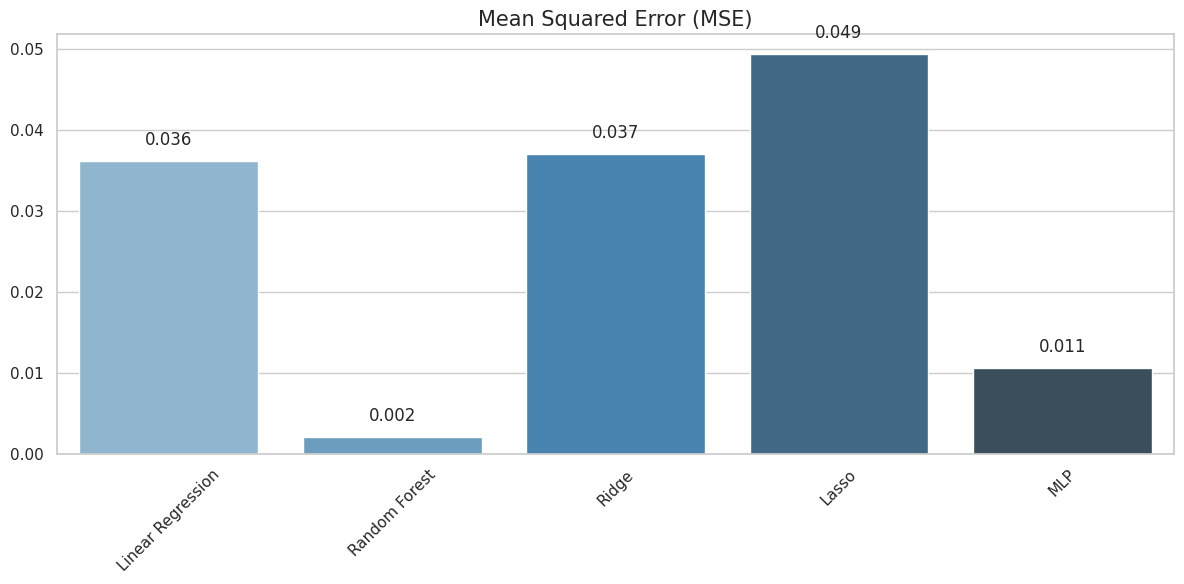

In [815]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=models, y=mses, palette="Blues_d", hue=models, dodge=False, legend=False)
plt.title('Mean Squared Error (MSE)', fontsize=15)
plt.xticks(rotation=45)
for i, v in enumerate(mses):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=12)


plt.tight_layout()
plt.show()

__In last one graph best one was Random Forest and here this is the worst result in learning time__

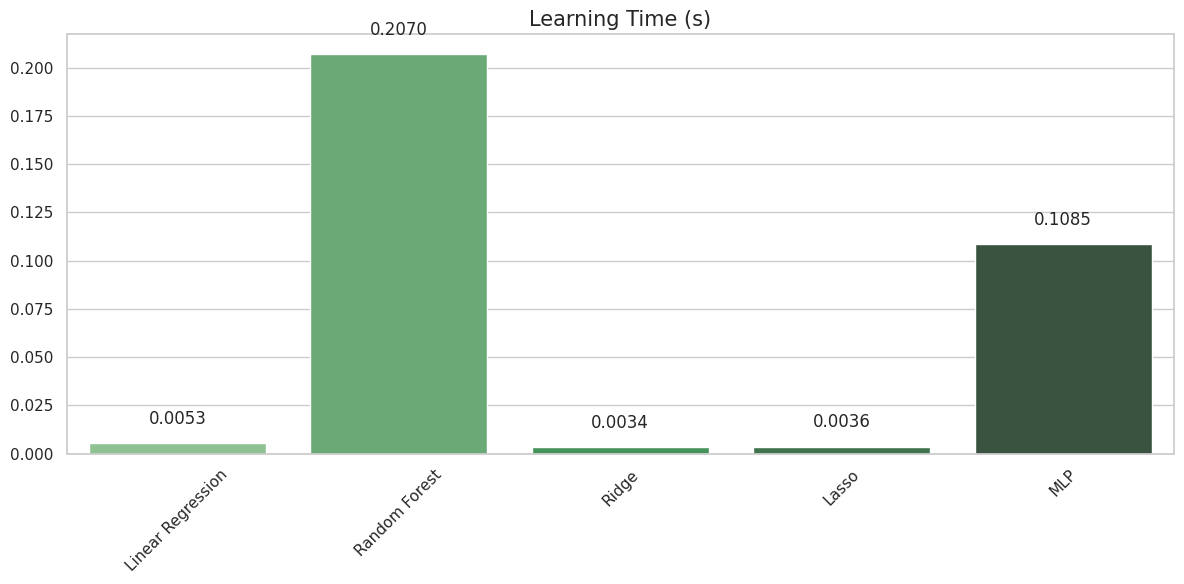

In [816]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=models, y=learning_times, palette="Greens_d", hue=models, dodge=False, legend=False)
plt.title('Learning Time (s)', fontsize=15)
plt.xticks(rotation=45)
for i, v in enumerate(learning_times):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

__In error plots, Random Forest shows the best result and outperforms other types of models by a large margin__

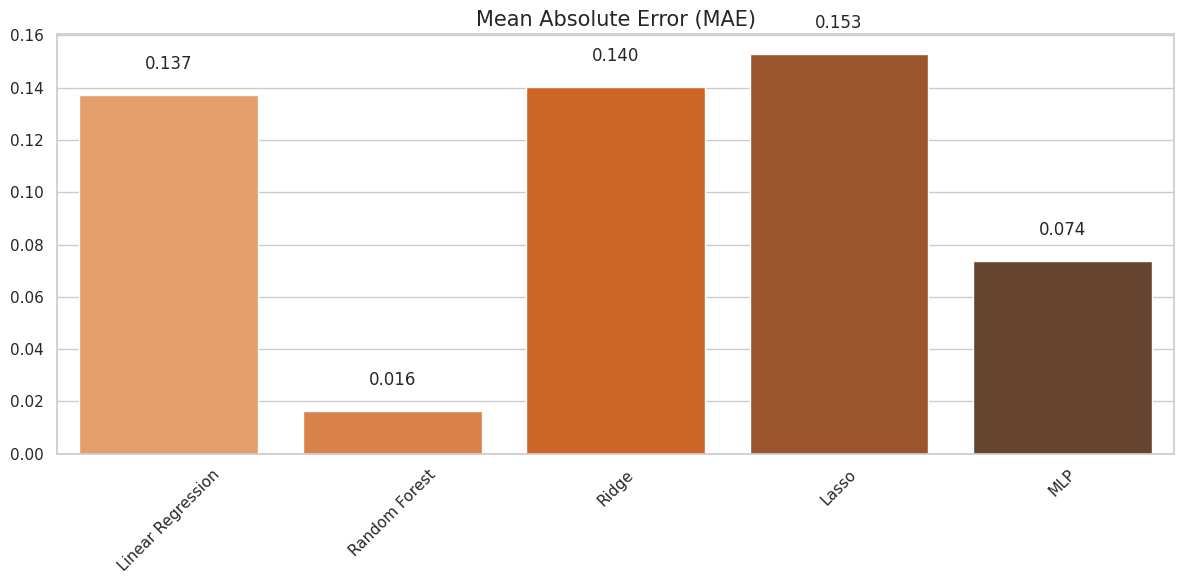

In [817]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=models, y=maes, palette="Oranges_d", hue=models, dodge=False, legend=False)
plt.title('Mean Absolute Error (MAE)', fontsize=15)
plt.xticks(rotation=45)
for i, v in enumerate(maes):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

__But on the accuracy graphs, Random Forest is still the best of all, but its result is only 0.2 more than MLP, but training is twice as long, so it can be a choice between speed and accuracy__

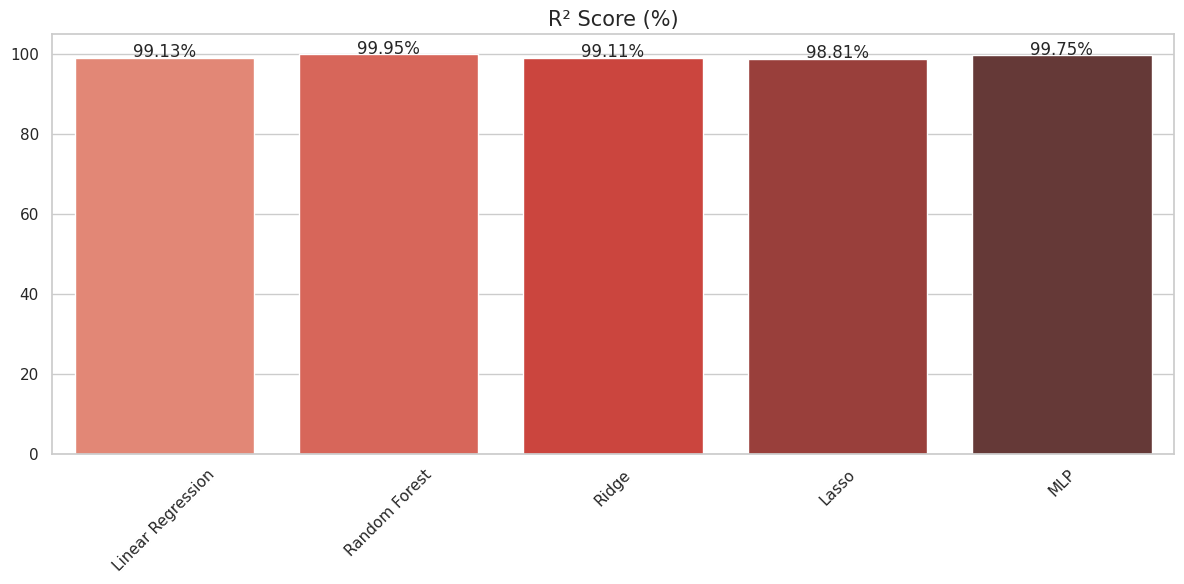

In [818]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=models, y=r2_scores, palette="Reds_d", hue=models, dodge=False, legend=False)
plt.title('R² Score (%)', fontsize=15)
plt.xticks(rotation=45)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In the end, we investigated different types of models such as Linear Regression, Random Forest, Ridge, Lasso, MLP, what exactly created a useful model for companies that work with people directly, and it is no less interesting that we learned which model is best suited for tasks similar to this .  
And so we found out that the best type of model is Random Forest, here's how it works and why it's the slowest model in training
Random Forest is a powerful ensemble learning method that combines multiple tree solutions to improve overall model accuracy. Here's how it works:

1. **Building Multiple Decision Trees:** Random Forest builds many decision trees (typically hundreds or thousands) based on random subsets of data and features. This provides diversity between trees, which helps avoid overtraining.

2. **Random data samples:** For each tree in the forest, a random subset of the data (with repetitions, known as a bootstrap sample) is used. This means that each tree sees only a part of all data.

3. **Random selection of features:** At each branching of the tree, a subset of features is randomly selected to be used to determine the best distribution. This further reduces the correlation between trees.

4. **Aggregation of results:** Once the forest is trained, each tree makes a prediction and the final Random Forest prediction is formed by aggregating the predictions of all trees. For regression problems, the average value of forecasts is used, and for classification problems, the majority of votes (majority principle).

**Why Random Forest can give better results:**

- **Ensemble nature:** Combining the results of several decision trees allows to reduce the errors of individual trees and provide a more stable forecast.
- **Reduced Overtraining:** Due to the random selection of data and features, Random Forest is less subject to overtraining compared to a single decision tree.

**Why Random Forest can learn longer:**

- **Many trees:** Since Random Forest generates and trains a large number of trees, it takes more time to compute.
- **Randomizing Features:** Randomizing features at each node can also increase training time because more possible distributions need to be tested.
- **Combination of results:** To obtain the final prediction, the predictions of all trees must be taken into account, which also adds to the processing time.

Although Random Forest can be slower to train, its ability to reduce errors and high-quality results often make the training time worthwhile.